In [ ]:
# Add the 'drive' package of 'gogle.colab' to access Gogle Drive.
from google.colab import drive

# Mounted your Google Drive to the '/content/drive' directory within the Colab environment.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# To manipulate and analyze data, importedd the pandas library.
import pandas as pd

# Load the numpy library in order to carry out numerical calculations and array operations.
import numpy as np

# Use the matplotlib.pyplot module to import visualizations (such as plots and graphs) in order to construct them.
import matplotlib.pyplot as pltted

# Import the Seaborn library, which is based on matplotlib and is used for statistical data visualization.
import seaborn as sssns

# Import the warnings module and suppress warning messages to keep the output clean.
import warnings
warnings.filterwarnings('ignore')

# Import different evaluation measures for evaluated the performance of the model from slearn.
#accuracy_score: Indicates the model's total accuracy.
#precision_score: Determines the proportion of relevant items in the selection.
#recall_score: Indicates the proportion of pertinent items chosen.
#f1_score: Provides a statistic that combines recall and precision.
#classification_report: Offers a thorough classification report including support, f1-scor, recal, && precission.
#conflict_matrix: Shows the confusion matrix to assess the accuracy of the model predictions.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [ ]:
# Read the CSV file from the specified path into a pandas DataFrame.
# This file contains data related to the CICIDS 2017 dataset for cybersecurity analysis.
cic_ids_2017 = pd.read_csv('/content/drive/MyDrive/Pooja_Fullcode/CICIDS_2017_CODE/combined.csv')

# Show the DataFrame's shape, which provides the dataset's row and column counts.
cic_ids_2017.shape

(2830743, 79)

In [ ]:
# Show the DataFrame {cic_ids_2017}'s first five rows.
# This gives an overview of the data, including column names and a preview of the content in each row.
cic_ids_2017.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# Randomly shuffle the rows of the DataFrame `cic_ids_2017`.
# The `frac=1` ensures that 100% of the data is sampled, which effectively shuffles the entire dataset.
# Resetting the shuffle DataFrame's index with {reset_index(drop=True)} removes the earlier index and prevents it from being added as a new column.
cic_ids_2017 = cic_ids_2017.sample(frac=1).reset_index(drop=True)

# Re-display the DataFrame's form to ensure that, even after shuffling, the number for rows and columns stays the same.
cic_ids_2017.shape


(2830743, 79)

In [ ]:
# Determine how many times each distinct value appears in the DataFrame {cic_ids_2017}'s 'Labelld' column.
# The number of instances that fall into each class and category (such as attack kinds or regular traffic) is broken down below.
cic_ids_2017[' Label'].value_counts()


,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


In [ ]:
# Create a new dataframe with the specified class distributions.
benign_df = cic_ids_2017[cic_ids_2017[' Label'] == 'BENIGN'].sample(n=250000, random_state=42)
dos_hulk_df = cic_ids_2017[cic_ids_2017[' Label'] == 'DoS Hulk'].sample(n=23107, random_state=42)
portscan_df = cic_ids_2017[cic_ids_2017[' Label'] == 'PortScan'].sample(n=15893, random_state=42)
ddos_df = cic_ids_2017[cic_ids_2017[' Label'] == 'DDoS'].sample(n=12802, random_state=42)

# Get the remaining classes with their original counts.
remaining_classes = cic_ids_2017[~cic_ids_2017[' Label'].isin(['BENIGN', 'DoS Hulk', 'PortScan', 'DDoS'])]

# Combine the sampled dataframes.
new_cicids = pd.concat([benign_df, dos_hulk_df, portscan_df, ddos_df, remaining_classes], axis=0)

# Shuffle the new dataframe.
new_cicids = new_cicids.sample(frac=1).reset_index(drop=True)
new_cicids.shape

(341418, 79)

In [ ]:
# Count the instances of every distinct value in the DataFrame {cic_ids_2017}'s 'Label' column.
## This provides an overview of the number of occurrences that fall into each class and category (e.g., attack kinds or regular traffic).
new_cicids[' Label'].value_counts()

cicids = new_cicids

,count
Label,
BENIGN,250000
DoS Hulk,23107
PortScan,15893
DDoS,12802
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


In [ ]:
# Replace occurrences of the value 'Web Attack � Brute Force' in the 'Label' column
# with the new value 'Attack_Brute Force' to standardize and simplify the label names.
cicids[' Label'] = cicids[' Label'].replace('Web Attack � Brute Force', 'Attack_Brute Force')

# Similarly, replace 'Web Attack � Sql Injection' with 'Attack_Sql Injection' in the 'Label' column.
cicids[' Label'] = cicids[' Label'].replace('Web Attack � Sql Injection', 'Attack_Sql Injection')

# Finally, replace 'Web Attack � XSS' with 'Attack_XSS' to standardize this attack label in the 'Label' column.
cicids[' Label'] = cicids[' Label'].replace('Web Attack � XSS', 'Attack_XSS')


In [ ]:
# Output the quantity of distinct values found in the DataFrame {cicids}'s 'Label' column.
# This provides information on how many distinct classes or categories are present in the dataset.
print(len(cicids[' Label'].unique()))

# Print a separator line for better readability of the output.
print('=========================================')

# Print the unique values in the 'Label' column to see the distinct labels or categories in the dataset.
print(cicids[' Label'].unique())


15
['BENIGN' 'DoS GoldenEye' 'SSH-Patator' 'DDoS' 'PortScan' 'DoS Hulk'
 'DoS slowloris' 'DoS Slowhttptest' 'Bot' 'FTP-Patator'
 'Attack_Brute Force' 'Attack_XSS' 'Infiltration' 'Attack_Sql Injection'
 'Heartbleed']


In [ ]:
# Determine how many missing (null) values there are in the whole {cicids} DataFrame.
# {isnull()} generates a data frame of the identical layout, but instead of values, it uses boolean values to indicate missing values.
# `sum()` applied twice first counts missing values per column and then sums these counts across all columns.
cicids.isnull().sum().sum()


153

In [ ]:
# Take out of the DataFrame {cicids} those rows that have missing (null) values.
# `inplace=True` modifies the original DataFrame directly without needing to assign the result to a new variable.
cicids.dropna(inplace=True)

# Remove all duplicate rows from the DataFrame `cicids`.
# `inplace=True` ensures that the original DataFrame is updated in place, removing any exact duplicate rows.
cicids.drop_duplicates(inplace=True)


In [ ]:
# Display the shape of the DataFrame `cicids` after removing missing values and duplicates.
# The revised DataFrame's row and column counts are displayed below.
cicids.shape


(321305, 79)

In [ ]:
# After removing rows with null values, determine the total number for missing (null) values within the DataFrame {cicids}.
# This ensures that there are no remaining missing values in the DataFrame.
cicids.isnull().sum().sum()


0

In [ ]:
# Determine how many times each distinct value appears in the DataFrame {cicids}'s 'Label' column.
# This gives an overview of how the various classes or categories within the dataset are distributed.
cicids[' Label'].value_counts()


,count
Label,
BENIGN,242120
DoS Hulk,17623
PortScan,14566
DDoS,12802
DoS GoldenEye,10286
FTP-Patator,5933
DoS slowloris,5385
DoS Slowhttptest,5228
SSH-Patator,3219


In [ ]:
# Display the shape of the DataFrame `cicids` to show the number of rows and columns.
# This provides an overview of the current size of the DataFrame after any data cleaning or manipulation.
cicids.shape


(321305, 79)

In [ ]:
# Check for infinite values.
print(cicids.isin([np.inf, -np.inf]).any().any())

True


In [ ]:
# Check for infinite values in each column.
print(cicids.isin([np.inf, -np.inf]).any())

 Destination Port              False
 Flow Duration                 False
 Total Fwd Packets             False
 Total Backward Packets        False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
 Idle Std                      False
 Idle Max                      False
 Idle Min                      False
 Label                         False
Length: 79, dtype: bool


This code uses `StandardScaler` to normalize the numerical properties of the `cicids` DataFrame. In order to prevent problems during scaling, it first substitutes NaN for any infinite numbers. In order to guarantee that the features have the same scale using machine learning models, it then chooses numeric columns or applies standardization by eliminating the mean or scaling to unit variance.


In [ ]:
# Import a StandardScaler is class from sklearn.preprocessing to normalize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# Replace infinite values (both positive and negative infinity) with NaN in the DataFrame `cicids`.
# This ensures that the scaling process does not encounter issues with infiiniite values.
cicids.replace([np.inf, -np.inf], np.nan, inplace=True)

# Select columns with numeric data types (integer and float) from the DataFrame `cicids`.
# `select_dtypes()` filters columns based on their data types, and `include=['int64', 'float64']` specifies these types.
numeric_columns = cicids.select_dtypes(include=['int64', 'float64']).columns

# Instantiate the StandardScaler object for standardizing numerical features.
scaler = StandardScaler()

# Scale the DataFrame {cicids}'s numeric columns according to usual procedure.
# After calculating the standard deviation and mean, the data is transformed using `fit_transform()`.
cicids[numeric_columns] = scaler.fit_transform(cicids[numeric_columns])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make an object called LabelEncoder.
label_encoder = LabelEncoder()

# Select the object and category columns.
object_cat_cols = cicids.select_dtypes(include=['object', 'category'])

# Iterate through each column and apply label encoding.
for col in object_cat_cols:
    cicids[col] = label_encoder.fit_transform(cicids[col])

# Print the converted DataFrame's initial few rows.
cicids.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-0.429907,-0.474364,-0.010398,-0.008828,-0.053307,-0.006826,-0.238909,0.443503,-0.082742,-0.261922,...,0.003020,-0.169801,-0.118608,-0.187005,-0.138061,-0.370188,-0.139746,-0.381884,-0.352394,3
1,-0.429907,-0.477181,-0.011786,-0.009889,-0.056294,-0.006868,-0.218282,0.690640,-0.002910,-0.261922,...,0.003020,-0.169801,-0.118608,-0.187005,-0.138061,-0.370188,-0.139746,-0.381884,-0.352394,3
2,-0.428414,-0.146881,-0.003454,-0.005642,-0.017456,-0.001750,0.318021,-0.297906,0.019899,0.349675,...,0.003029,-0.168873,-0.118608,-0.186348,-0.137023,-0.105817,-0.139746,-0.126863,-0.085185,6
3,-0.431621,-0.128594,0.015989,0.023027,0.137700,-0.005691,0.579297,-0.297906,0.186658,0.241660,...,0.003029,-0.169801,-0.118608,-0.187005,-0.138061,-0.370188,-0.139746,-0.381884,-0.352394,14
4,-0.428414,-0.415863,-0.007620,-0.010951,-0.059879,-0.006908,-0.292539,-0.199051,-0.290305,-0.261922,...,0.003020,-0.169801,-0.118608,-0.187005,-0.138061,-0.370188,-0.139746,-0.381884,-0.352394,5


In [ ]:
# dropped some unusefull columns.
cicids.drop(columns=[' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'], inplace=True)


In [ ]:
# drop nan value.
cicids.dropna(inplace=True)


In [ ]:
# remove duplicates
cicids.drop_duplicates(inplace=True)

print(cicids.shape)


(321171, 71)


In [ ]:
# divide data into X and y.
X = cicids.drop(' Label', axis=1)
y = cicids[' Label']

X.shape, y.shape

((321171, 70), (321171,))

In [ ]:
# Counting the values using value_counts.
y.value_counts()

,count
Label,
3,242005
7,17623
13,14554
5,12802
6,10286
10,5931
9,5385
8,5228
14,3219


In [ ]:
# SelectKBest is imported from the feature_selection module of scikit-learn. This function is helpful for feature selection with machine learning since it chooses the top 'k' features according to a scoring system.
# Bringing in mutual_info_classif from the feature_selection module of scikit-learn.
# The mutual information, or measure of dependency, between each feature & the target variable is estimated using this scoring formula. It helps choose the most pertinent features for categorization tasks.
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Construct a SelectKBest class with k=25 and mutuall_info_classified.
selector = SelectKBest(mutual_info_classif, k=25)

#Transform the data by fitting the selector to it.
X_selected = selector.fit_transform(X, y)
X_selected

array([[-0.47436387, -0.05330678, -0.00682588, ..., -0.05330678,
        -0.00682582, -0.24791878],
       [-0.47718105, -0.05629438, -0.00686757, ..., -0.05629438,
        -0.00686751, -0.24791878],
       [-0.14688071, -0.01745561, -0.00175019, ..., -0.01745561,
        -0.00174987, -0.22056818],
       ...,
       [-0.4745695 , -0.05738983, -0.00679839, ..., -0.05738983,
        -0.00679833, -0.24791878],
       [-0.47696777, -0.05768859, -0.00688087, ..., -0.05768859,
        -0.00688081, -0.24791878],
       [-0.45062654, -0.05968032, -0.00176394, ..., -0.05968032,
        -0.00176362, -0.22126353]])

In [ ]:
# Use sklearn.model_selection to import the train_test_split method.
from sklearn.model_selection import train_test_split

# Create sets for testing and training from characteristics that were picked (X_selected) and labels (y).
# random_state=42 ensures that every split can be repeated, meaning it will never change.
# 20% of the collected information is to be used for testing & 80% for trained, based on the tested_size=0.2 configuration.
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Show the training & testing sets' shape (the quantity of samples & features) for X as well as Y.
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((256936, 25), (64235, 25), (256936,), (64235,))

Key classification performance parameters like accuracy, precision, recall, & F1 score are computed and shown via the `model_performance` function. To guarantee that class imbalance and multi-class jobs is handled effectively, it begins by computing the metrics via `average='weighted'` utilizing the true labels (`y`) or predicted values (`prediction`). The function then provides a succinct report of the model's performance by printing these metrics formatted into two decimal places. A thorough classification report with each class's accuracy, recall, F1 rating, and assistance is also printed.

The function uses confusion_matrix to generate and plot the confusion matrix on a heatmap to facilitate visual interpretation. This makes it possible to see both accurate and inaccurate forecasts for various classes. A color-coded heatmap that shows the predicted actual labels on the y and x axes, respectively, is used to illustrate the confusion matrix. This set of metric computations and visualizations offers a thorough assessment of the model's functionality.



In [ ]:
def model_performance(y, prediction, title):
    # Calculate the performance metrics using true labels `y` and predicted values `prediction`.

    #Calculate the accuracy score, which is the proportion of accurately predicted cases to all instances.
    accuracy = accuracy_score(y, prediction)

    # Determine all expected positive observations divided by all correctly predicted positive observations to get the precision score.
    # `average='weighted'` accounts for class imbalance when calculating precision for multi-class situations.
    precision = precision_score(y, prediction, average='weighted')

    # Determine the recall score, that is the ratio of all correctly predicted positive observations to all actual positive observations.
    # `average='weighted'` manages multi-class situations by taking into account the proportionate contributions of each class.
    recall = recall_score(y, prediction, average='weighted')

    # Determine the precision & recall harmonic means, or F1 score.
    # `average='weighted'` guarantees that the score for multi-class tasks that are unbalanced is computed.
    f1 = f1_score(y, prediction, average='weighted')

    # Print a formatted report of the performance metrics.
    print('=====================================================')

    # Format the accuracy score in two decimal places and print it.
    # The variable 'accuracy' is thought to contain the computed accuracy value.
    print('Accuracy Score : {:.2f}'.format(accuracy))

    # Format the precision score in two decimal places and print it.
    # The variable 'precision' is thought to contain the computed precision value.
    print('Precision Score: {:.2f}'.format(precision))

    # Format the recall score in two decimal places before printing it.
    # The variable'recall' is thought to contain the computed recall value.
    print('Recall Score   : {:.2f}'.format(recall))

    # Format the F1 score in two decimal places and print it.
    # The variable 'f1' is thought to contain the computed F1 score value.
    print('F1 Score       : {:.2f}'.format(f1))


    print('=====================================================')

    # Print the complete classification report, which contains each class's support, recall, precision, and f1-score.
    print(classification_report(y, prediction))

    print('=====================================================================================')

    # Create the confusion matrix by contrasting the expected and true labels.
    cm_dectree = confusion_matrix(y, prediction)

    # Plot the confusion matrix as a heatmap for better visual interpretation.
    # `annot=True` displays the cell values, `cmap="Blues"` sets the color theme, and `fmt="d"` formats labels as integers.
    pltted.figure(figsize=(9, 7))
    sssns.heatmap(cm_dectree, annot=True, cmap="Blues", fmt="d")
    pltted.xlabel("Predicted label")  # Set x-axis label as 'Predicted label'.
    pltted.ylabel("True label")       # Set y-axis label as 'True label'.
    pltted.title(title)               # Set the title of the plot based on the input `title`.
    pltted.show()                     # Display the heatmap.


The ROC curves of multi-class classification are visualized using the `plot_multiclass_roc` function. For ROC calculations, it first decides how many classes there are and binarizes the actual labels. The function uses a loop to calculate the AUC, FPR, and TPR for each class, and then prints the results for each class. Additionally, it computes the AUC and micro-average ROC curve, which treat each class equally. Lastly, the program plots the micro-average curve and the ROC curves for each class in different colors. It then styles the plot using labels, a title, or a legend while displaying it.


In [ ]:
# Bringing in roc_curve from the metrics module of scikit-learn.
# A Receiver Operation Characteristic (ROC) curve, which is calculated using the function roc_curve, aids in assessing a classification model's performance at different threshold values.
# Bringing in auc (Area Under its Curve) from the metrics module of scikit-learn.
# To evaluate the model's performance, auc calculates an area over the ROC curve, giving a single scalar value.
from sklearn.metrics import roc_curve, auc

# Bringing in label_binarize from the preprocessing module of scikit-learn.
# In order to calculate ROC curves for multi-class classification issues, #label_binarize is employed to convert category labels into a format that is binary (one-hot encoding).
from sklearn.preprocessing import label_binarize

def plot_multiclass_roc(y_true, y_pred_proba):
    #{y_true}: Labels for ground truth.
    # {y_pred_proba}: Classifier output (predicted probabilities) for each class.

    # Determine the number of classes from the shape of the predicted probabilities.
    n_classes = y_pred_proba.shape[1]

    # Binarize the true labels to one-vs-rest format for multiclass ROC calculation.
    # This converts categorical labels into binary format for each class.
    y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

    # Set up dictionaries to hold each class's ROC AUC, rate of true positives (TPR), and false positive rate (FPR).
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Loop over each class to compute its ROC curve and AUC score.
    for i in range(n_classes):
        # Use roc_curve to determine the FPR, TPR, or thresholds of the current class.
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])

        # Determine the current class's Area Below the Curve (AUC).
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Print each class's AUC result.
        print(f"Class {i} ROC-AUC: {roc_auc[i]:.8f}")

    # Compute the micro-average ROC curve and AUC (this treats each class equally in multiclass setting).
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # The micro-average AUC value should be printed.
    print(f"Micro-average ROC-AUC: {roc_auc['micro']:.8f}")

    # Draw every ROC curve for every class.
    pltted.figure(figsize=(10, 8))  # Set the plot size.

    # Generate distinct colors for each class using a color map.
    colors = pltted.cm.rainbow(np.linspace(0, 1, n_classes))

    # Plot the ROC curve for every class using a loop.
    for i, color in zip(range(n_classes), colors):
        pltted.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')

    #The micro-average curve of the ROC should be plotted.
    pltted.plot(fpr["micro"], tpr["micro"], color='navy', lw=2, linestyle=':', label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})')

    # The micro-average curve of the ROC should be plotted.
    pltted.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Establish the limitations on the y and x axes.
    pltted.xlim([0.0, 1.0])
    pltted.ylim([0.0, 1.05])

    # Define the plot title and label the axes.
    pltted.xlabel('False Positive Rate')
    pltted.ylabel('True Positive Rate')
    pltted.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')

    # Include a legend in the story.
    pltted.legend(loc="lower right")

    # Display the plot.
    pltted.show()


# Xgboost Classifier.

In [ ]:
# The scikit-learn library's RandomizedSearchCV, which is used to do hyperparameter tuning via randomly searching through a predetermined parameter grid, is imported.
from sklearn.model_selection import RandomizedSearchCV
# Introducing the XGBoost package (xgboost), a potent machine learning technique that uses gradient boosting to effectively handle tasks including regression and classification.
import xgboost as xgb

# Initialize the XGBoost classifier.
xgb_clf = xgb.XGBClassifier()

# Establish the RandomizedSearchCV parameter grid.
param_dist = {
    'n_estimators': [50,100],
    'learning_rate': [0.01, 0.2],
    'max_depth': [3, 4]
}

# Set up the RandomizdSarchCV.
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist,n_iter=5, scoring='accuracy', verbose=1)

# Fit the RandomizedSearchCV.
random_search.fit(X_train, y_train)

# Get the better model.
best_xgb_clf = random_search.best_estimator_
# Make predictions.
xgb_predictions_train = best_xgb_clf.predict(X_train)
xgb_predictions = best_xgb_clf.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


# Training Results.

Accuracy Score : 0.99
Precision Score: 0.99
Recall Score   : 0.99
F1 Score       : 0.99
              precision    recall  f1-score   support

           0       0.57      0.94      0.71      1175
           1       1.00      0.58      0.73        19
           2       0.66      0.14      0.22       509
           3       0.99      1.00      1.00    182889
           4       0.93      0.68      0.79      1556
           5       1.00      1.00      1.00     10190
           6       0.99      0.99      0.99      8268
           7       1.00      0.98      0.99     13996
           8       0.99      0.99      0.99      4178
           9       1.00      1.00      1.00      4319
          10       1.00      1.00      1.00      4758
          11       1.00      1.00      1.00        10
          12       1.00      0.94      0.97        31
          13       0.99      1.00      1.00     11743
          14       0.99      0.98      0.98      2585

    accuracy                           0.99   

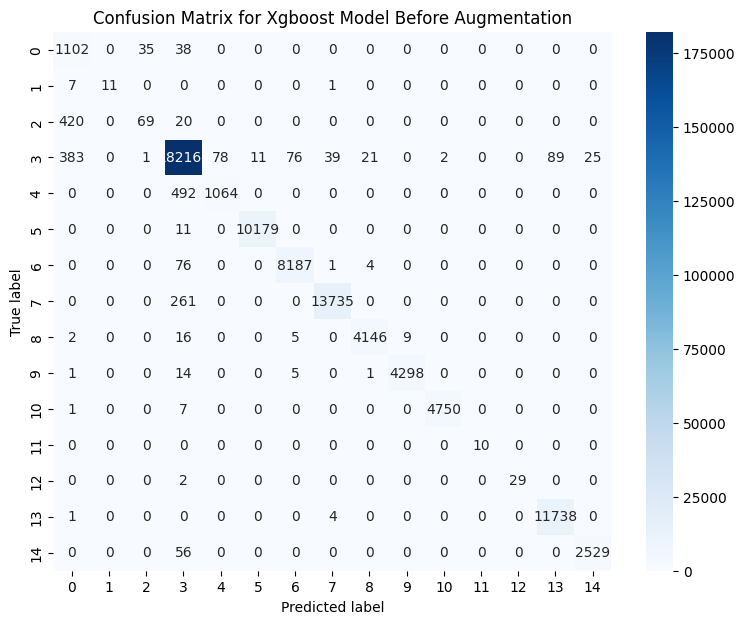

In [ ]:
# Evaluate the model performance.
model_performance(y_train, xgb_predictions_train, 'Confusion Matrix for Xgboost Model Before Augmentation')

Class 0 ROC-AUC: 0.99884265
Class 1 ROC-AUC: 0.99999359
Class 2 ROC-AUC: 0.99817437
Class 3 ROC-AUC: 0.99972038
Class 4 ROC-AUC: 0.99930612
Class 5 ROC-AUC: 0.99999913
Class 6 ROC-AUC: 0.99997352
Class 7 ROC-AUC: 0.99993950
Class 8 ROC-AUC: 0.99996997
Class 9 ROC-AUC: 0.99998155
Class 10 ROC-AUC: 0.99999981
Class 11 ROC-AUC: 1.00000000
Class 12 ROC-AUC: 0.99999810
Class 13 ROC-AUC: 0.99995472
Class 14 ROC-AUC: 0.99998945
Micro-average ROC-AUC: 0.99997822


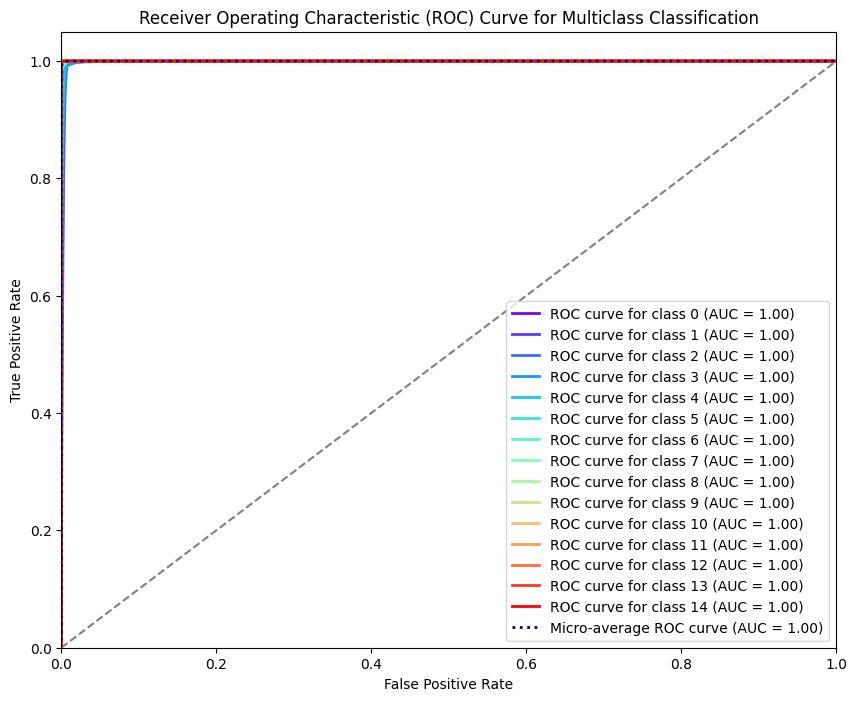

In [ ]:
# Get predicted probabilities instead of class labels.
xgb_predictions_train_proba = best_xgb_clf.predict_proba(X_train)

# Plot the ROC curve for multiclass classification.
plot_multiclass_roc(y_train, xgb_predictions_train_proba)

# Testing Results.

Accuracy Score : 0.99
Precision Score: 0.99
Recall Score   : 0.99
F1 Score       : 0.99
              precision    recall  f1-score   support

           0       0.56      0.92      0.69       295
           1       0.00      0.00      0.00         2
           2       0.41      0.08      0.13       143
           3       0.99      1.00      0.99     45705
           4       0.89      0.65      0.75       392
           5       1.00      1.00      1.00      2612
           6       0.99      0.99      0.99      2018
           7       1.00      0.98      0.99      3603
           8       0.99      0.99      0.99      1050
           9       1.00      0.99      0.99      1066
          10       1.00      1.00      1.00      1173
          11       1.00      1.00      1.00         1
          12       1.00      0.40      0.57         5
          13       0.99      1.00      1.00      2858
          14       0.98      0.97      0.97       634

    accuracy                           0.99   

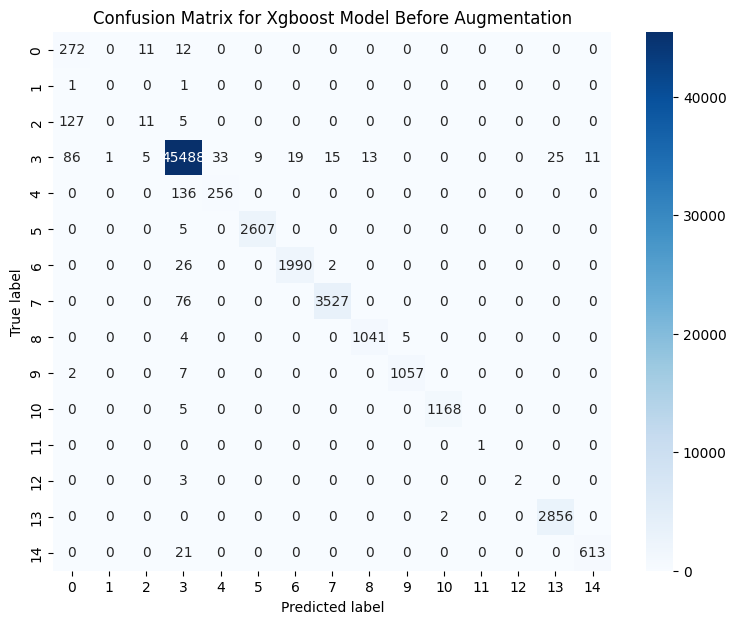

In [ ]:
# Evaluate the model performance.
model_performance(y_test, xgb_predictions, 'Confusion Matrix for Xgboost Model Before Augmentation')

Class 0 ROC-AUC: 0.99849532
Class 1 ROC-AUC: 0.99997969
Class 2 ROC-AUC: 0.99719136
Class 3 ROC-AUC: 0.99952693
Class 4 ROC-AUC: 0.99868266
Class 5 ROC-AUC: 0.99999573
Class 6 ROC-AUC: 0.99996921
Class 7 ROC-AUC: 0.99991503
Class 8 ROC-AUC: 0.99991418
Class 9 ROC-AUC: 0.99994146
Class 10 ROC-AUC: 0.99999936
Class 11 ROC-AUC: 1.00000000
Class 12 ROC-AUC: 0.98530186
Class 13 ROC-AUC: 0.99995026
Class 14 ROC-AUC: 0.99998694
Micro-average ROC-AUC: 0.99995904


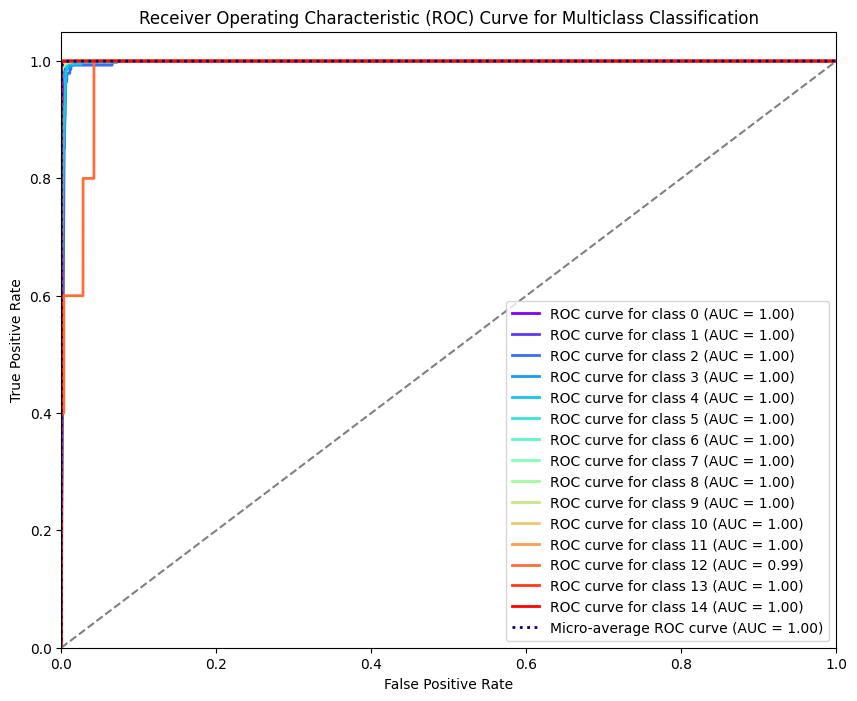

In [ ]:
# Get predicted probabilities instead of class labels.
xgb_predictions_test_proba = best_xgb_clf.predict_proba(X_test)

# Plot the ROC curve for multiclass classification.
plot_multiclass_roc(y_test, xgb_predictions_test_proba)

# Extra Tree Classifier.

In [ ]:
# importin the extr-tree-classifier from scekit learn module.
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the ExtraTreesClassifier.
et_clf = ExtraTreesClassifier()

# The RandomizedSearchCV parameter grid should be defined.
param_dist = {
    'n_estimators': [50, 100],       # The forest's tree count.
    'max_depth': [3, 4, None],       # Deepest the tree can go.
    'min_samples_split': [2, 5, 10], # The bare minimum of samples needed to open an internal node.
}

# Set up the RandomizedSearchCV.
random_search = RandomizedSearchCV(et_clf, param_distributions=param_dist, n_iter=5, scoring='accuracy', verbose=1, cv=5)

# Fit the RandomizedSearchCV.
random_search.fit(X_train, y_train)

# Get the bettr model.
best_et_clf = random_search.best_estimator_

# Using the training data, make predictions.
et_predictions_train = best_et_clf.predict(X_train)

# Using the test results, make predictions.
et_predictions = best_et_clf.predict(X_test)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


# Training Results.

Accuracy Score : 1.00
Precision Score: 1.00
Recall Score   : 1.00
F1 Score       : 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1175
           1       1.00      0.84      0.91        19
           2       1.00      0.98      0.99       509
           3       1.00      1.00      1.00    182889
           4       0.96      0.73      0.83      1556
           5       1.00      1.00      1.00     10190
           6       1.00      1.00      1.00      8268
           7       1.00      0.99      0.99     13996
           8       1.00      1.00      1.00      4178
           9       1.00      1.00      1.00      4319
          10       1.00      1.00      1.00      4758
          11       1.00      1.00      1.00        10
          12       1.00      0.97      0.98        31
          13       0.99      1.00      1.00     11743
          14       1.00      0.99      1.00      2585

    accuracy                           1.00   

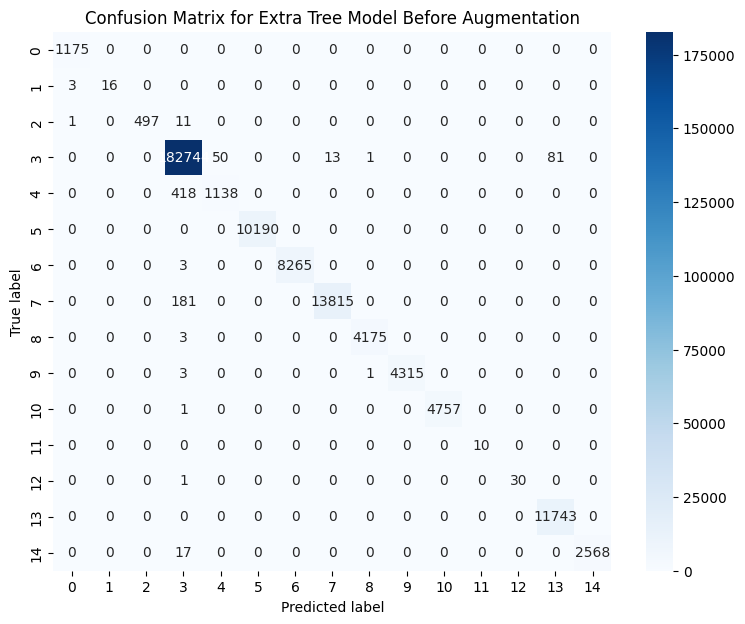

In [ ]:
# Evaluate the model performance.
model_performance(y_train, et_predictions_train, 'Confusion Matrix for Extra Tree Model Before Augmentation')

Class 0 ROC-AUC: 0.99999997
Class 1 ROC-AUC: 0.99999904
Class 2 ROC-AUC: 0.99999864
Class 3 ROC-AUC: 0.99995484
Class 4 ROC-AUC: 0.99960324
Class 5 ROC-AUC: 1.00000000
Class 6 ROC-AUC: 1.00000000
Class 7 ROC-AUC: 0.99998596
Class 8 ROC-AUC: 0.99999999
Class 9 ROC-AUC: 0.99999998
Class 10 ROC-AUC: 1.00000000
Class 11 ROC-AUC: 1.00000000
Class 12 ROC-AUC: 0.99999980
Class 13 ROC-AUC: 0.99996964
Class 14 ROC-AUC: 0.99999976
Micro-average ROC-AUC: 0.99999772


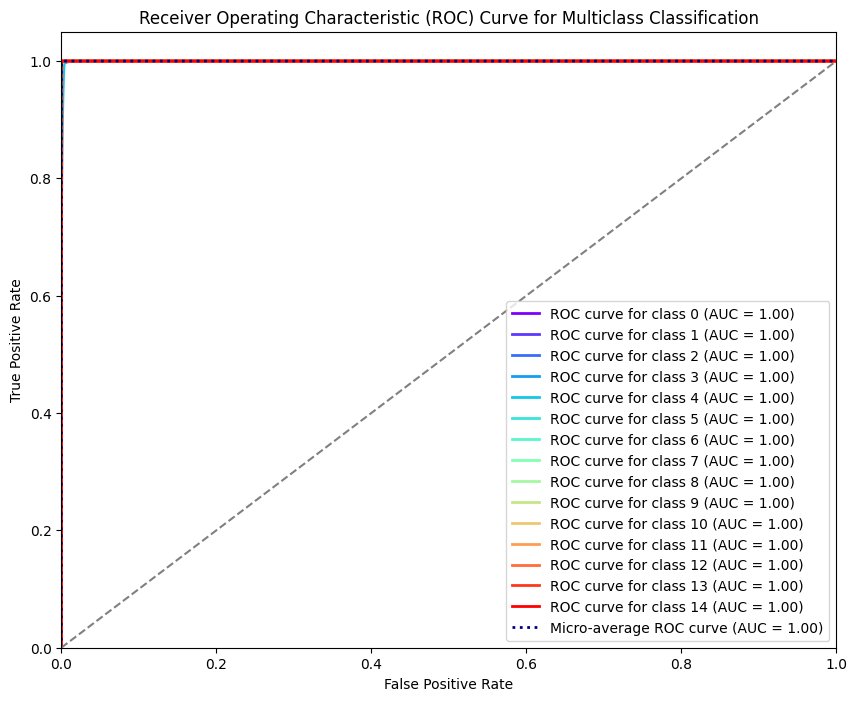

In [ ]:
# Get predicted probabilities instead of class labels.
et_predictions_train_proba = best_et_clf.predict_proba(X_train)

# Plot the ROC curve for multiclass classification.
plot_multiclass_roc(y_train, et_predictions_train_proba)

# Testing Results.

Accuracy Score : 0.99
Precision Score: 0.99
Recall Score   : 0.99
F1 Score       : 0.99
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       295
           1       0.00      0.00      0.00         2
           2       0.39      0.38      0.39       143
           3       0.99      1.00      0.99     45705
           4       0.82      0.67      0.73       392
           5       1.00      1.00      1.00      2612
           6       0.99      0.99      0.99      2018
           7       0.99      0.98      0.98      3603
           8       0.99      0.99      0.99      1050
           9       1.00      0.99      0.99      1066
          10       1.00      1.00      1.00      1173
          11       1.00      1.00      1.00         1
          12       1.00      0.40      0.57         5
          13       0.99      1.00      1.00      2858
          14       0.96      0.94      0.95       634

    accuracy                           0.99   

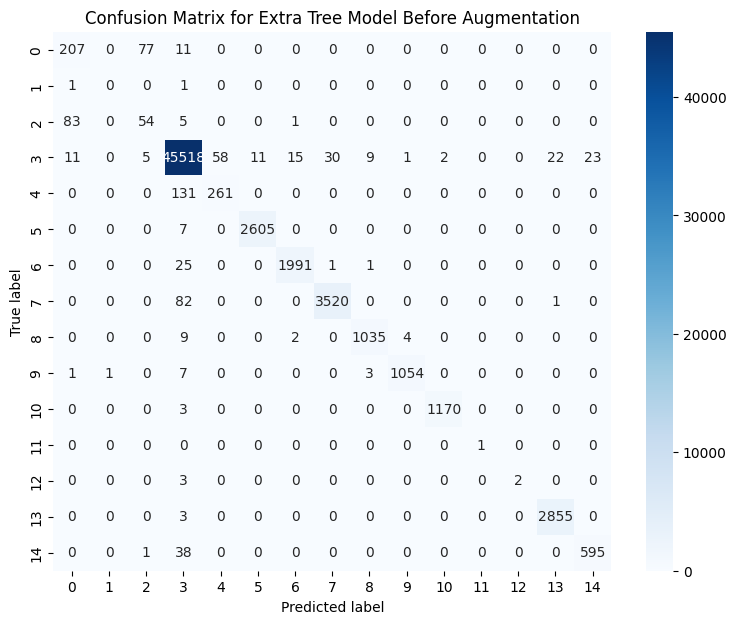

In [ ]:
# Evaluate the model performance.
model_performance(y_test, et_predictions, 'Confusion Matrix for Extra Tree Model Before Augmentation')

Class 0 ROC-AUC: 0.95811828
Class 1 ROC-AUC: 0.74980505
Class 2 ROC-AUC: 0.83398446
Class 3 ROC-AUC: 0.99610531
Class 4 ROC-AUC: 0.97851494
Class 5 ROC-AUC: 0.99958541
Class 6 ROC-AUC: 0.99594389
Class 7 ROC-AUC: 0.99340696
Class 8 ROC-AUC: 0.99705407
Class 9 ROC-AUC: 0.99714254
Class 10 ROC-AUC: 0.99871990
Class 11 ROC-AUC: 1.00000000
Class 12 ROC-AUC: 0.79977093
Class 13 ROC-AUC: 0.99956036
Class 14 ROC-AUC: 0.99200289
Micro-average ROC-AUC: 0.99798667


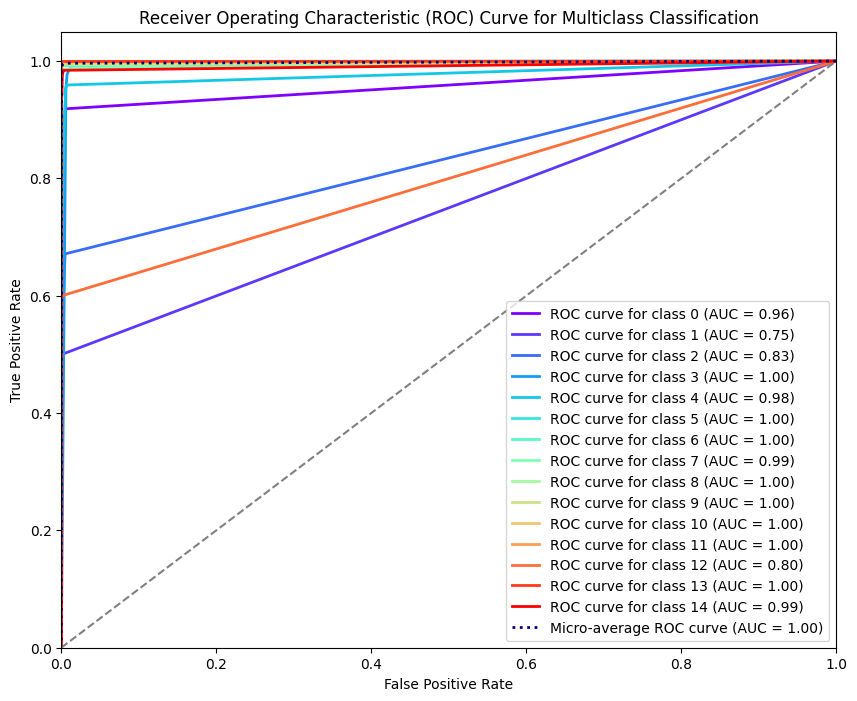

In [ ]:
# Get predicted probabilities instead of class labels.
et_predictions_test_proba = best_et_clf.predict_proba(X_test)

# Plot the ROC curve for multiclass classification.
plot_multiclass_roc(y_test, et_predictions_test_proba)

# LSTM Classifier.

In [ ]:
# Reshape X_train and X_test for use in models that require 3D store.
x_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
x_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Check the new shapes.
print(x_train_reshaped.shape)  # The anticipated form is (number of features, number of samples, 1).
print(x_test_reshaped.shape)   # The anticipated form is (number of features, number of samples, 1).


(256936, 25, 1)
(64235, 25, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train && y_test are your labels.
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [ ]:
! pip install -U keras-tuner

In [ ]:
len(y.unique())

15

In [ ]:
n_classes = len(y.unique())

In [ ]:
# Kerastuner, a library for Keras model hyperparameter optimization, is imported as kt.
# It assists in determining the optimal hyperparameters for deep learning model construction.
import kerastuner as kt

# By importing the Sequential system from TensorFlow Keras, we can stack the model's layers in a linear fashion, one after the other.
from tensorflow.keras.models import Sequential

# Adding certain layers: # - LSTM (Long The short-term Memory), an RNN layer type that works well with sequential data (like time series).
#- Dense, a layer of a neural network that is entirely connected.
#- Dropout, a regularization method that avoids overfitting by randomly dropping units during training.
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Bringing in different optimizers from Tensor Keras, which are model weight update algorithms:
#- Adam, an optimizer that calculates adaptive learning rates (Adaptive Moment Estimation).
#- A traditional optimizer with a steady learning rate is SGD (Stochastic Gradient Descent).
#- An adaptive learning rate technique is RMSprop (Roots Mean Square Propagation).
#- Adadelta is an optimizer that adjusts learning rates according to gradient updates' changing window.
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta

def create_classifier(hp):
    classifier = Sequential()

    # LSTM layer
    classifier.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32), return_sequences=True, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])))
    classifier.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    classifier.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32), return_sequences=False))
    classifier.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    classifier.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    classifier.add(Dense(n_classes, activation='softmax'))

    # Optimizer.
    optimizer_name = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])
    if optimizer_name == 'adam':
        optimizer = Adam()
    elif optimizer_name == 'sgd':
        optimizer = SGD()
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop()
    else:
        optimizer = Adadelta()

    classifier.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return classifier

# Initialize the tuner
tuner = kt.RandomSearch(create_classifier, objective='val_accuracy', max_trials=2, executions_per_trial=1)

# Search for the best hyperparameters.
tuner.search(x_train_reshaped, y_train_categorical, epochs=10, validation_data=(x_test_reshaped, y_test_categorical))

# Get the best model and hyperparameters.
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best hyperparameters: LSTM Units: {best_hps.get('lstm_units')}, Dense Units: {best_hps.get('dense_units')}, "
      f"Dropout: {best_hps.get('dropout')}, Optimizer: {best_hps.get('optimizer')}")

# Build the best model.
best_model = tuner.hypermodel.build(best_hps)

# Train the best model.
history = best_model.fit(x_train_reshaped, y_train_categorical, epochs=20, validation_split=0.0005)

# Predict on test data.
lstm_prediction_train = best_model.predict(x_train_reshaped)
lstm_prediction = best_model.predict(x_test_reshaped)

y_train_classes = np.argmax(y_train_categorical, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

lstm_prediction_train2 = np.argmax(lstm_prediction_train, axis=1)
lstm_prediction2 = np.argmax(lstm_prediction, axis=1)

Reloading Tuner from ./untitled_project/tuner0.json
Best hyperparameters: LSTM Units: 64, Dense Units: 96, Dropout: 0.4, Optimizer: adam
Epoch 1/20
8026/8026 ━━━━━━━━━━━━━━━━━━━━ 50s 6ms/step - accuracy: 0.8376 - loss: 0.6156 - val_accuracy: 0.8682 - val_loss: 0.3239
Epoch 2/20
8026/8026 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - accuracy: 0.8998 - loss: 0.2787 - val_accuracy: 0.8915 - val_loss: 0.1538
Epoch 3/20
8026/8026 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - accuracy: 0.9137 - loss: 0.2305 - val_accuracy: 0.9612 - val_loss: 0.1266
Epoch 4/20
8026/8026 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - accuracy: 0.9335 - loss: 0.1906 - val_accuracy: 0.9535 - val_loss: 0.1150
Epoch 5/20
8026/8026 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - accuracy: 0.9417 - loss: 0.1700 - val_accuracy: 0.9690 - val_loss: 0.0773
Epoch 6/20
8026/8026 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - accuracy: 0.9474 - loss: 0.1583 - val_accuracy: 0.9767 - val_loss: 0.0773
Epoch 7/20
8026/8026 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - accuracy: 0.9495 - l

# Testing Results.

In [ ]:
accuracy = accuracy_score(lstm_prediction2, y_test_classes)
precision = precision_score(lstm_prediction2, y_test_classes, average='weighted')
recall = recall_score(lstm_prediction2, y_test_classes, average='weighted')
f1 = f1_score(lstm_prediction2, y_test_classes, average='weighted')

print('=====================================================')
print('Accuracy Score : {:.2f}'.format(accuracy))
print('Precision Score: {:.2f}'.format(precision))
print('Recall Score   : {:.2f}'.format(recall))
print('F1 Score       : {:.2f}'.format(f1))

Accuracy Score : 98.45
Precision Score: 99.14
Recall Score   : 98.45
F1 Score       : 98.69


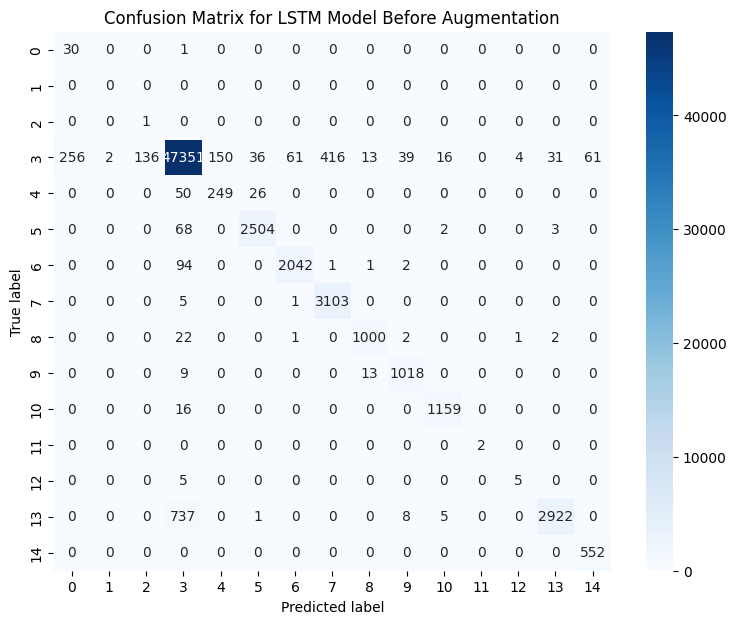

In [ ]:
print('=====================================================================================')
# Get the confusion matrix.
cm_dectree = confusion_matrix(lstm_prediction2, y_test_classes)
# Create a heatmap of the confusion matrix.
pltted.figure(figsize=(9, 7))
sssns.heatmap(cm_dectree, annot=True, cmap="Blues", fmt="d")
pltted.xlabel("Predicted label")
pltted.ylabel("True label")
pltted.title('Confusion Matrix for LSTM Model Before Augmentation')
pltted.show()

Class 0 ROC-AUC: 0.99557323
Class 1 ROC-AUC: 0.98700045
Class 2 ROC-AUC: 0.99417429
Class 3 ROC-AUC: 0.99380236
Class 4 ROC-AUC: 0.99568158
Class 5 ROC-AUC: 0.99971280
Class 6 ROC-AUC: 0.99944187
Class 7 ROC-AUC: 0.99771348
Class 8 ROC-AUC: 0.99947721
Class 9 ROC-AUC: 0.99864884
Class 10 ROC-AUC: 0.99974547
Class 11 ROC-AUC: 1.00000000
Class 12 ROC-AUC: 0.95882678
Class 13 ROC-AUC: 0.99735524
Class 14 ROC-AUC: 0.99709815
Micro-average ROC-AUC: 0.99949210


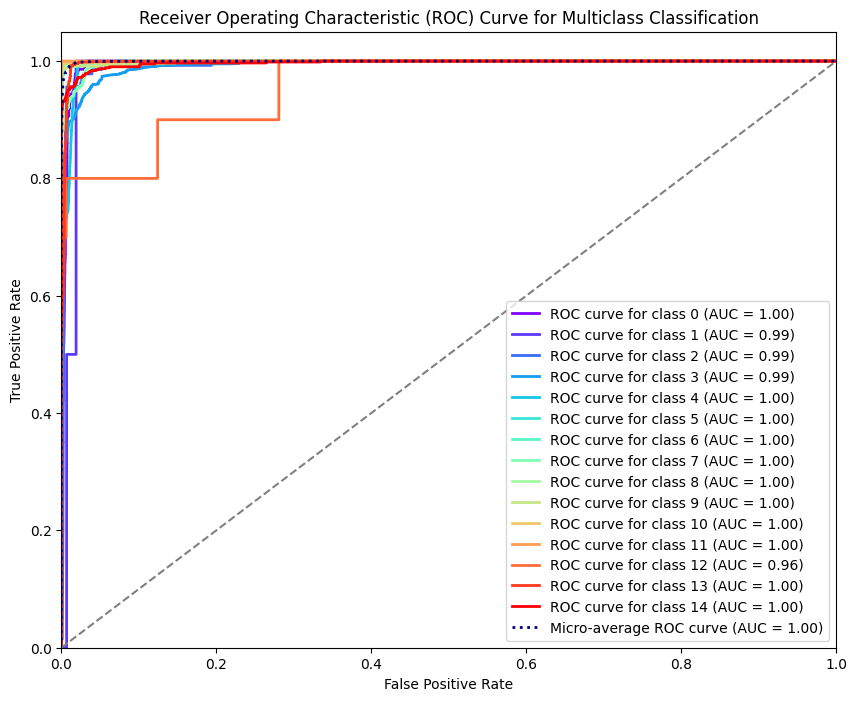

In [ ]:
# Plot the ROC curve for multiclass classification.
plot_multiclass_roc(y_test_classes, lstm_prediction)